## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# **Importing google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **reading the dataset**

In [ ]:
air=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

# **an overview of the dataset**

In [ ]:
air.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
air.shape

(48895, 16)

In [ ]:
air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **description about the columns host_id and host_name through describe() function**

In [ ]:
air['host_id'].describe()

count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
25%      7.822033e+06
50%      3.079382e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64

In [ ]:
air['host_name'].describe()

count       48874
unique      11452
top       Michael
freq          417
Name: host_name, dtype: object

# **data pre-processing of NAN values**

In [ ]:
air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **checking the missing data in the dataset through a heat map**

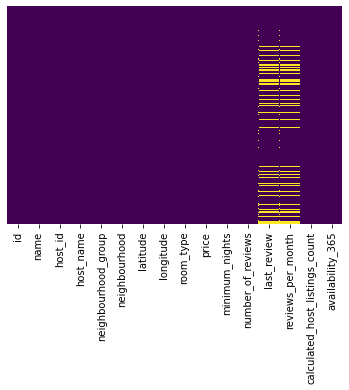

In [ ]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
air['last_review']=air['last_review'].fillna(0)
air['reviews_per_month']=air['reviews_per_month'].fillna(0)

# **we filled the NAN values with zeroes so we'll see an empty graph**

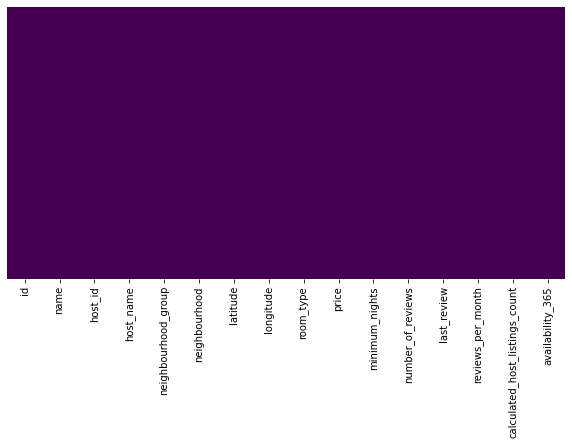

In [ ]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
new_air=air[~air['name'].isnull()]

In [ ]:
air[air['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,0,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [ ]:
#dropping those rows having null host_name value
new_air=new_air[~new_air['host_name'].isnull()]
new_air.shape

(48858, 16)

In [ ]:
# To get the busiest hosts 
new=air.groupby(['host_id','neighbourhood_group'],as_index=True).size()
new=new.sort_values(ascending=False)
new.head(20)

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
7503643    Brooklyn                52
1475015    Manhattan               52
120762452  Manhattan               50
2856748    Manhattan               49
205031545  Manhattan               49
190921808  Manhattan               47
2119276    Manhattan               39
26377263   Brooklyn                35
119669058  Brooklyn                34
25237492   Manhattan               34
113805886  Manhattan               33
dtype: int64

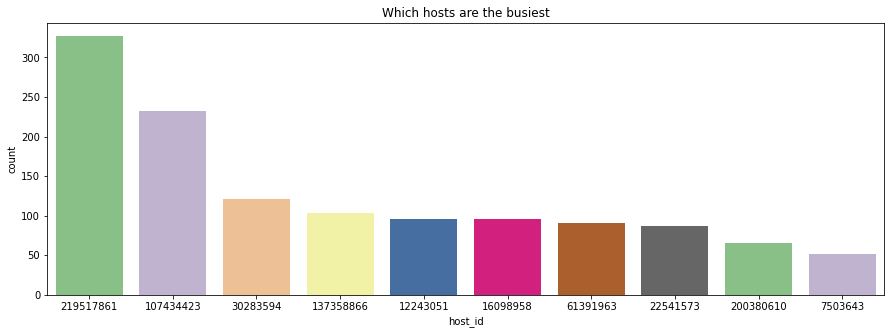

In [ ]:
plt.figure(1, figsize=(15, 5))
plt.title("Which hosts are the busiest")
sns.countplot(x = "host_id", order=air['host_id'].value_counts().index[0:10] ,data=air,palette='Accent')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


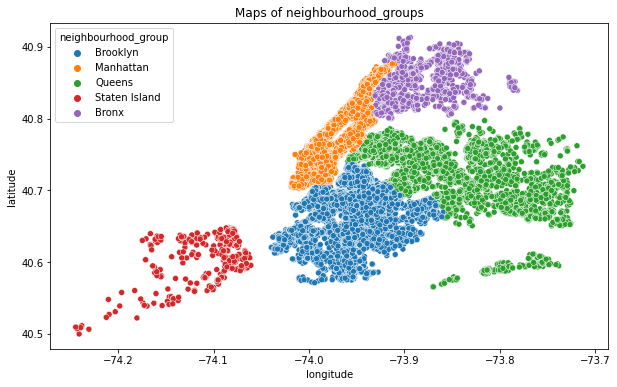

In [ ]:
# locations
plt.figure(figsize=(10,6))
plt.title('Maps of neighbourhood_groups')
sns.scatterplot(air.longitude, air.latitude, hue=air.neighbourhood_group)

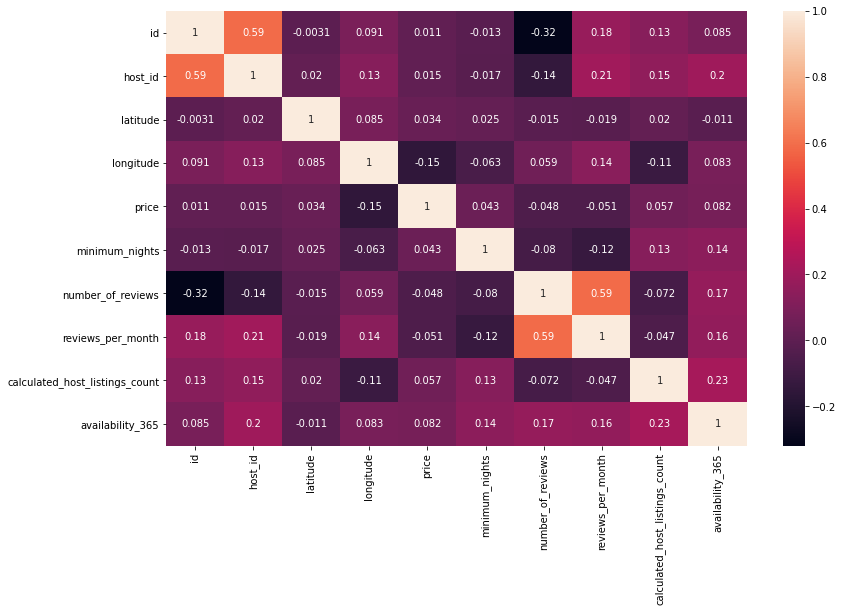

In [ ]:
#Get Correlation between different variables

plt.figure(figsize=(13,8))
corr=air.corr(method='pearson')
sns.heatmap(corr, annot=True)

In [ ]:
# Let's have a look at our 5 main neighbourhood regions - 

# Brooklyn
neigh_1 = air.loc[air['neighbourhood_group'] == 'Brooklyn']
neigh_price1 = neigh_1[['price']]

# Manhattan
neigh_2 = air.loc[air['neighbourhood_group'] == 'Manhattan']
neigh_price2 = neigh_2[['price']]

# Queens
neigh_3 = air.loc[air['neighbourhood_group'] == 'Queens']
neigh_price3 = neigh_3[['price']]

# Staten Island
neigh_4 = air.loc[air['neighbourhood_group'] == 'Staten Island']
neigh_price4 = neigh_4[['price']]

# Bronx
neigh_5 = air.loc[air['neighbourhood_group'] == 'Bronx']
neigh_price5 = neigh_5[['price']]

price_list = [neigh_price1, neigh_price2, neigh_price3, neigh_price4, neigh_price5]

In [ ]:
# Creating an empty list which we will append with statistics & neighbourhood region.
price_dist = []
neighbourhood_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']



for i in price_list:
    x = i.describe(percentiles = [.25, .50, .70])
    x = x.iloc[3:]
    x.reset_index(inplace = True)
    x.rename(columns = {'index':'Stats'}, inplace = True)
    price_dist.append(x)

price_dist[0].rename(columns = {'price':neighbourhood_list[0]}, inplace = True)
price_dist[1].rename(columns = {'price':neighbourhood_list[1]}, inplace = True)
price_dist[2].rename(columns = {'price':neighbourhood_list[2]}, inplace = True)
price_dist[3].rename(columns = {'price':neighbourhood_list[3]}, inplace = True)
price_dist[4].rename(columns = {'price':neighbourhood_list[4]}, inplace = True)

stats_df = price_dist
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df = stats_df[0].join(stats_df[1:])
stats_df.style.background_gradient(cmap = 'Reds')

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
70%,130.000000,200.000000,100.000000,100.000000,87.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


In [ ]:
# we see manhattan has the highest average(50%) ,followed by brooklyn 

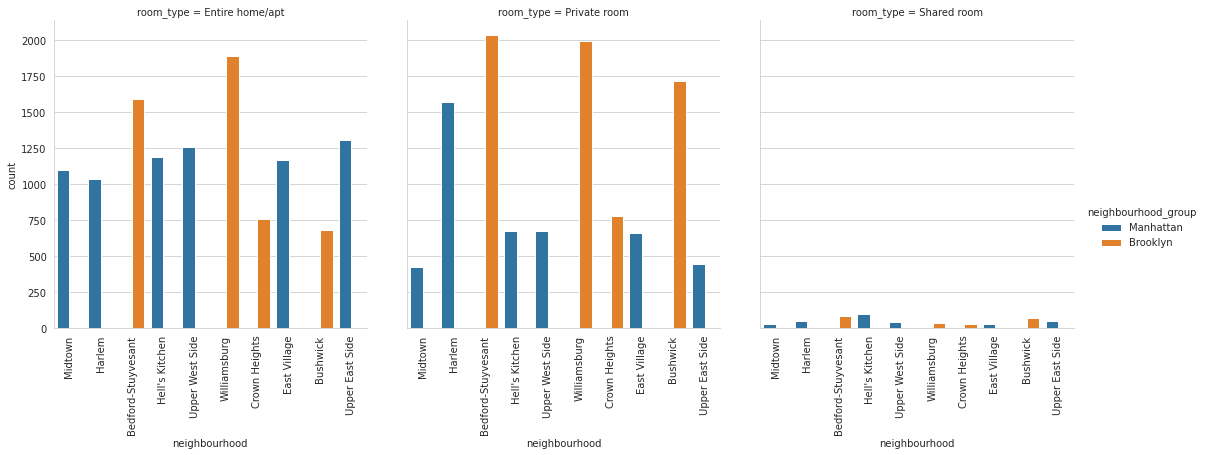

In [ ]:
sub_data = air.loc[air['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 
                                           'Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village',
                                           'Upper East Side', 'Crown Heights', 'Midtown'])]
sns.set_style('whitegrid')
plot = sns.catplot(x = 'neighbourhood', hue = 'neighbourhood_group',
           col= 'room_type', data = sub_data, kind = 'count')
plot.set_xticklabels(rotation = 90)

In [ ]:
# Seems to me like private room has more popularity, since tourists from all over the word will likely opt to stay in a
# cozy comfortable room.
# Bedford-Stuyvesant and Williamsburg have the highest popularity.
# The importance of shared room is very less, as seen in the above chart.
# Also, we can see there are only two neighbourhood regions - Manhattan and Brooklym.
# Considering the popularity & tourist attractions, these 2 regions hold more value compared to others.

In [ ]:
most_reviews = air.nlargest(10, 'number_of_reviews')
most_reviews

price_average = most_reviews['price'].mean()
print("Average price per night is: ", price_average)



Average price per night is:  65.4


In [ ]:
air['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
air['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64